In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris               
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense

# RETI NEURALI DENSE

Nel seguente proggetto andremo a creare diversi modelli di reti neurali per la categorizzazione di due differenti dataframe.
1. Per la categorizzazione bi-classe di un dataframe sui tumori, nella quale si andrà a predire se un dato tumore (evento) con un certo numero di features, è **benigno** (classe 0) o **maligno** (classe 1);
2. Per la categorizzazione di 3 classi sul dataset Iris, nella quale si andrà a predire se un dato fiore (evento) con un certo numero di features, è una **Setosa** (classe 0), **Versicolor** (classe 1) o **Virginica** (classe 2)

## CATEGORIZZAZIONE DEI TUMORI TRAMITE RETE NEURALE

Andiamo a importare i dataset e inserire un nome per ogni colonna (che comprenderanno le features e il target). Andando in fine a stampare la tabella di tutti i valori, la tabella descrittiva più la tabella di correlazione delle features.

In [54]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                            names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

display(breast_cancer)
display(breast_cancer.describe())
display((breast_cancer.drop(['diagnosis','id'],axis=1)).corr())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Andiamo adesso a divudere i dati nelle features e nei target, dopo di che, dato che il target è espresso in numeri anzi che lettere, andiamo ad utilizzare la funzione LabelEncoder per convertire le B e M in 0 e 1 (target), inoltre andiamo anche a standardizzare i vaalori delle features tramite la funzione StandarScaler

In [44]:
X = breast_cancer.drop(['diagnosis','id'],axis=1).values
Y = breast_cancer['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Rete neurale densa normale.
Importiamo il primo modello di rete neurale densa non profonda, quindi il seguente modello conterrà solo:
* 30 **nodi di input**, cioè pari al numero di features del dataframe, con funzione di attivazione **relu**;
* 12 **nodi intermedi (nascosti)**, con funzione di attivazione **relu**;
* 1 **nodo di output** essendo una categorizzazione binaria, con funzione di attivazione **sigmoidale**.

In [45]:
model = Sequential()
model.add(Dense(12, input_dim=30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

Alleniamo il modello sui dati di training:

In [46]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5726 - loss: 0.6790
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 0.6088 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.5427 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.4988 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9026 - loss: 0.4472 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.4099 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.3690 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.3387 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.3211 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.2995 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.2806 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

Calcoliamo e printiamo la loss e l'accuratezza sui dati di test:

In [47]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.0852  
Loss sul test set: 0.0947
Accuracy sul test set: 0.9591


Importiamo e grafichiamo la matrice di confusione per avere un'idea generale più precisa sulle misure di predizione fatte tramite il seguente modello

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


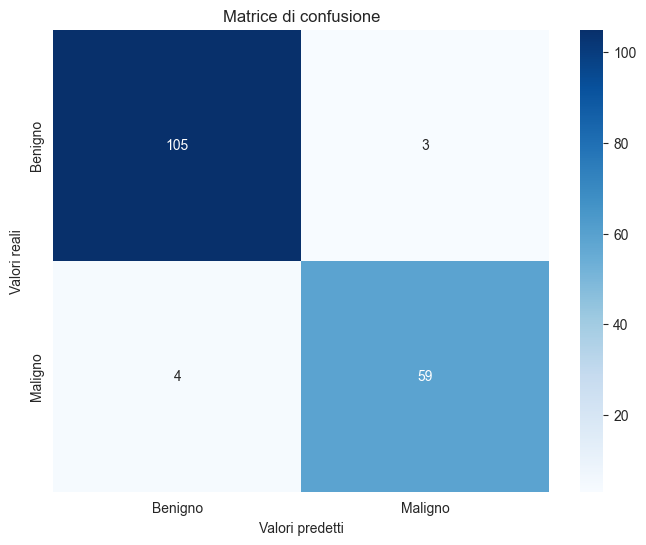

In [48]:
y_pred=model.predict(X_test)
y_pred_int = [1 if pred > 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y_test, y_pred_int)
labels = ['Benigno', 'Maligno']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Valori predetti')
plt.ylabel('Valori reali')
plt.title('Matrice di confusione')
plt.show()

Il nostro modello ha dunque:
* sbagliato a categorizzare 4 tumori maligni come tumori benigni;
* sbagliato a categorizzare 3 tumori benigni come tumori maligni;
* correttamente categorizzato 105 tumori benigni su 108;
* correttamente categorizzato 59 tumori maligni su 63.

### Rete neurale densa profonda.
Importiamo ora un modello di rete neurale densa profonda, cioè che avra più di uno strato denso nascosto, quindi il seguente modello conterrà:
* 30 **nodi di input**, cioè pari al numero di features del dataframe, con funzione di attivazione **relu**;
* 12 **nodi intermedi (nascosti)**, con funzione di attivazione **relu**;
* 8 **nodi intermedi (nascosti)**, con funzione di attivazione **relu**;
* 4 **nodi intermedi (nascosti)**, con funzione di attivazione **relu**;
* 1 **nodo di output** essendo una categorizzazione binaria, con funzione di attivazione **sigmoidale**.

In [71]:
model2 = Sequential()

model2.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

C:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205 (820.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model2.fit(X_train, y_train, epochs=150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3699 - loss: 0.6506
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4149 - loss: 0.6240 
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 0.6245 
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6027 - loss: 0.5826 
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.5897 
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7543 - loss: 0.5800 
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.5654 
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.5402 
Epoch 9/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8581 - loss: 0.5202 
Epoch 10/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9204 - loss: 0.5089 
Epoch 11/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - loss: 0.4987 
Epoch 12/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [52]:
loss, acc = model2.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9886 - loss: 0.1018 
Loss sul test set: 0.1127
Accuracy sul test set: 0.9766


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


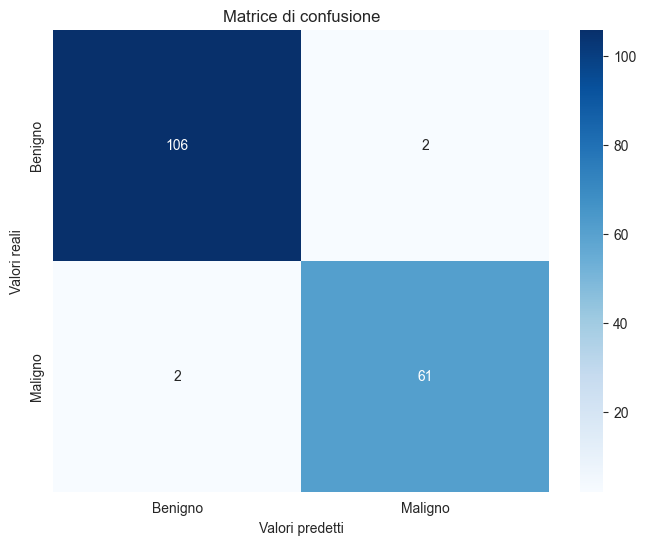

In [53]:
y_pred=model2.predict(X_test)
y_pred_int = [1 if pred > 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y_test, y_pred_int)
labels = ['Benigno', 'Maligno']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Valori predetti')
plt.ylabel('Valori reali')
plt.title('Matrice di confusione')
plt.show()

Il nostro modello ha dunque:
* sbagliato a categorizzare 2 tumori maligni come tumori benigni;
* sbagliato a categorizzare 2 tumori benigni come tumori maligni;
* correttamente categorizzato 106 tumori benigni su 108;
* correttamente categorizzato 61 tumori maligni su 63.

Solo aggiungendo qualche strato nascosto in più, il nostro modello di rete neurale artificiale è migliorato notevolmente

## CATEGORIZZAZIONE DELLA SPECIE DEI FIORI (DATASET IRIS) TRAMITE RETE NEURALE DENSA


Andiamo direttamente ad importare la rete neurale densa profonda, ma con qualche dettaglio che andrà cambiato, trattandosi di una categorizzazione a tre classi.

Importiamo dunque il dataset e dividiamo le features e i target nei set di addestramento e test:

In [57]:
dataset=load_iris()     
X=dataset.data          
y=dataset.target        
X_train, X_test, y_train, y_test = train_test_split(X, y) 

Creiamo il nostro modello di rete neurale densa profonda, sta volta per le funzioni di attivazione degli strati nascosti utilizziamo la **LeakyReLU**, questo cambiamento non è dato dal fatto che ci siano 3 classi, andava ugualmente bene anche la funzione **ReLU**. Quindi la nostra rete neurale sarà composta da:
* 4 **nodi di input**, cioè il numero di features del nostro dataframe, con funzione di attivazione **LeakyReLU**;
* 20 **nodi di intermedi (nascosti)**, con funzione di attivazione **LeakyReLU**;
* 16 **nodi di intermedi (nascosti)**, con funzione di attivazione **LeakyReLU**;
* 8 **nodi di intermedi (nascosti)**, con funzione di attivazione **LeakyReLU**;
* 3 **nodi di output**, con funzione di attivazione **Softmax**.

Ciò che è cambiato è che ora il numero di nodi di output è uguale al numero delle classi non trattandosi più di una categorizzazione binaria, la funzione di attivazione dello strato finale è la **softmax**, che restituisce la probabilità normalizzata per ogni classe. Inoltre cambia la funzione di loss e l'ottimizzazione.

In [67]:
model3 = Sequential()
model3.add(Dense(20, input_dim=X_train.shape[1]))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(16))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(8))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(3, activation="softmax"))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

C:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599 (2.34 KB)

 Trainable params: 599 (2.34 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3896 - loss: 0.8994
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6766 - loss: 0.8211 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.7688 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.7268 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7443 - loss: 0.6747 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.6817 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6516 - loss: 0.6647  
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.6414 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.6146 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5951 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6412 - loss: 0.5961 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6641 - los

In [69]:
loss, acc = model3.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9720 - loss: 0.1133  
Loss sul test set: 0.0862
Accuracy sul test set: 0.9737


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


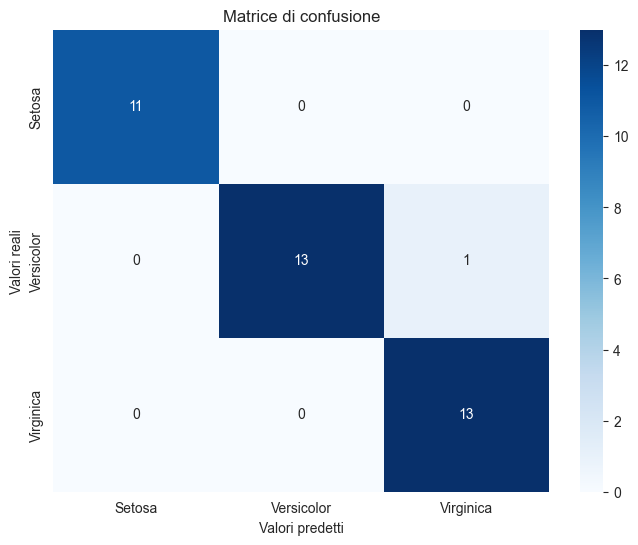

In [70]:
y_pred=model3.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_int)
labels = ['Setosa', 'Versicolor', 'Virginica']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Valori predetti')
plt.ylabel('Valori reali')
plt.title('Matrice di confusione')
plt.show()

Il nostro modello ha dunque:
* sbagliato a categorizzare una Versicolor come una Virginica;
* Correttamente categorizzato il resto dei fiori.